### Time Series Analysis - Financial Data

Importing Indian Nifty IT stocks dataset from yahoo finance and select the Adjusted Close (Adj Close) for all six stocks from 2014-01-01 to 2021-01-01. Saved the DataFrame in the variable stocks and performing the risk/return analysis over time.

__Ticker Symbols__:
- INFY.NS   : Infosys Limited
- HCLTECH.NS    : HCL Technologies Limited
- TCS.NS    : Tata Consulting Services Limited
- WIPRO.NS    : Wipro Limited
- MPHASIS.NS    : Mphasis Limited
- MINDTREE.NS    : Mindtree Limited

In [1]:
# Importing required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [2]:
# Date range for the data for our analysis
start_date = '2014-01-01'
end_date = '2021-01-01'

In [3]:
# Performing stock risk/return analysis of below companies. These are Nifty exchange ticker symbols from yahoo finance
tickers = ["INFY.NS", "HCLTECH.NS", "TCS.NS", "WIPRO.NS", "MPHASIS.NS", "MINDTREE.NS"]

In [4]:
# Importing stock price data from yahoo finance and stored in variable "stocks"
stocks = yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  6 of 6 completed


In [5]:
# Investigating data first five rows
stocks.head()

Adj Close                                                  \
            HCLTECH.NS     INFY.NS MINDTREE.NS  MPHASIS.NS      TCS.NS   
Date                                                                     
2014-01-01  279.067657  361.273071  332.055328  341.913696  922.809509   
2014-01-02  277.415619  362.580475  334.134491  334.239410  928.680603   
2014-01-03  279.344910  371.393463  342.793762  331.161926  952.336975   
2014-01-06  277.326904  366.471344  342.022125  332.564362  959.793823   
2014-01-07  278.590881  360.142822  339.021393  338.212921  945.458313   

                             Close                                      ...  \
              WIPRO.NS  HCLTECH.NS     INFY.NS MINDTREE.NS  MPHASIS.NS  ...   
Date                                                                    ...   
2014-01-01  194.602112  314.625000  433.500000  387.299988  438.850006  ...   
2014-01-02  194.690125  312.762512  435.068756  389.725006  429.000000  ...   
2014-01-03  195.975281  314.937500  445.643738  399.825012  425.049988  ...   
2014-01-06  196.468170  312.662506  439.737488  398.924988  426.850006  ...   
2014-01-07  193.721878  314.087494  432.143738  395.424988  434.100006  ...   

                  Open                                          Volume  \
           MINDTREE.NS  MPHASIS.NS       TCS.NS    WIPRO.NS HCLTECH.NS   
Date                                                                     
2014-01-01  381.250000  442.000000  1090.050049  211.500046     737988   
2014-01-02  389.237488  436.549988  1083.000000  207.262558    1030976   
2014-01-03  387.250000  424.250000  1082.349976  205.125046    2725944   
2014-01-06  400.000000  433.000000  1114.500000  209.962555    1392104   
2014-01-07  399.350006  426.299988  1120.000000  209.250046    3879316   

                                                               
             INFY.NS MINDTREE.NS MPHASIS.NS   TCS.NS WIPRO.NS  
Date                                                           
2014-01-01   1478688      111488      27140   529952  1181351  
2014-01-02   4404744      135380      32959  1726948  2441295  
2014-01-03  10046344      537584      88750  2618174  2953767  
2014-01-06  11098328      147608     129255  2311810  4948206  
2014-01-07   7713688      139732     216678  2897486  3286111  

[5 rows x 36 columns]

In [6]:
# Investigating data last five rows
stocks.tail()

Adj Close                                                      \
            HCLTECH.NS      INFY.NS  MINDTREE.NS   MPHASIS.NS       TCS.NS   
Date                                                                         
2020-12-24  915.669800  1236.050049  1597.699951  1554.550049  2903.824219   
2020-12-28  918.110046  1240.300049  1608.800049  1560.550049  2923.835938   
2020-12-29  932.153625  1250.300049  1621.750000  1559.199951  2924.933838   
2020-12-30  936.934387  1246.800049  1629.949951  1590.400024  2903.774170   
2020-12-31  942.362610  1255.800049  1660.349976  1539.949951  2857.312500   

                             Close                                         \
              WIPRO.NS  HCLTECH.NS      INFY.NS  MINDTREE.NS   MPHASIS.NS   
Date                                                                        
2020-12-24  381.342682  919.349976  1236.050049  1597.699951  1554.550049   
2020-12-28  382.041077  921.799988  1240.300049  1608.800049  1560.550049   
2020-12-29  384.136383  935.900024  1250.300049  1621.750000  1559.199951   
2020-12-30  383.537720  940.700012  1246.800049  1629.949951  1590.400024   
2020-12-31  385.383575  946.150024  1255.800049  1660.349976  1539.949951   

            ...         Open                                           Volume  \
            ...  MINDTREE.NS   MPHASIS.NS       TCS.NS    WIPRO.NS HCLTECH.NS   
Date        ...                                                                 
2020-12-24  ...  1600.000000  1572.800049  2909.000000  386.450012    4390561   
2020-12-28  ...  1597.800049  1560.000000  2910.000000  383.450012    3884750   
2020-12-29  ...  1617.000000  1568.400024  2920.000000  384.000000    6760167   
2020-12-30  ...  1625.000000  1545.099976  2934.399902  385.000000    6382809   
2020-12-31  ...  1629.000000  1587.000000  2900.000000  381.200012    3468390   

                                                               
            INFY.NS MINDTREE.NS MPHASIS.NS   TCS.NS  WIPRO.NS  
Date                                                           
2020-12-24  7313885     1576565     573967  1807144  12240172  
2020-12-28  4607051     1168908     345867  2108994   4725879  
2020-12-29  6878105      931884     492735  1994151  11459126  
2020-12-30  5194690      903715     261785  2637968   7188435  
2020-12-31  7430470      929998     191572  4040956   6394605  

[5 rows x 36 columns]

In [7]:
# Reviewing the data for any null values by using pandas "info" method
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1722 entries, 2014-01-01 to 2020-12-31
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, HCLTECH.NS)   1722 non-null   float64
 1   (Adj Close, INFY.NS)      1722 non-null   float64
 2   (Adj Close, MINDTREE.NS)  1722 non-null   float64
 3   (Adj Close, MPHASIS.NS)   1722 non-null   float64
 4   (Adj Close, TCS.NS)       1722 non-null   float64
 5   (Adj Close, WIPRO.NS)     1722 non-null   float64
 6   (Close, HCLTECH.NS)       1722 non-null   float64
 7   (Close, INFY.NS)          1722 non-null   float64
 8   (Close, MINDTREE.NS)      1722 non-null   float64
 9   (Close, MPHASIS.NS)       1722 non-null   float64
 10  (Close, TCS.NS)           1722 non-null   float64
 11  (Close, WIPRO.NS)         1722 non-null   float64
 12  (High, HCLTECH.NS)        1722 non-null   float64
 13  (High, INFY.NS)           1722 non-null   flo

In [8]:
# Generally we consider Close or Adj Close price for performing analysis. Hence, its consider Adj Closing price of stocks and stored in adj_close variable
adj_close = stocks['Adj Close']
adj_close.head()

,HCLTECH.NS,INFY.NS,MINDTREE.NS,MPHASIS.NS,TCS.NS,WIPRO.NS
Date,,,,,,
2014-01-01,279.067657,361.273071,332.055328,341.913696,922.809509,194.602112
2014-01-02,277.415619,362.580475,334.134491,334.239410,928.680603,194.690125
2014-01-03,279.344910,371.393463,342.793762,331.161926,952.336975,195.975281
2014-01-06,277.326904,366.471344,342.022125,332.564362,959.793823,196.468170
2014-01-07,278.590881,360.142822,339.021393,338.212921,945.458313,193.721878


In [9]:
# Renaming column names
adj_close = adj_close.rename(columns={'HCLTECH.NS': 'HCL', "INFY.NS":'INFY', 'MINDTREE.NS':'MINDTREE', 'MPHASIS.NS':"MPHASIS", 'TCS.NS': 'TCS', "WIPRO.NS":'WIPRO'})
adj_close.head()

,HCL,INFY,MINDTREE,MPHASIS,TCS,WIPRO
Date,,,,,,
2014-01-01,279.067657,361.273071,332.055328,341.913696,922.809509,194.602112
2014-01-02,277.415619,362.580475,334.134491,334.239410,928.680603,194.690125
2014-01-03,279.344910,371.393463,342.793762,331.161926,952.336975,195.975281
2014-01-06,277.326904,366.471344,342.022125,332.564362,959.793823,196.468170
2014-01-07,278.590881,360.142822,339.021393,338.212921,945.458313,193.721878


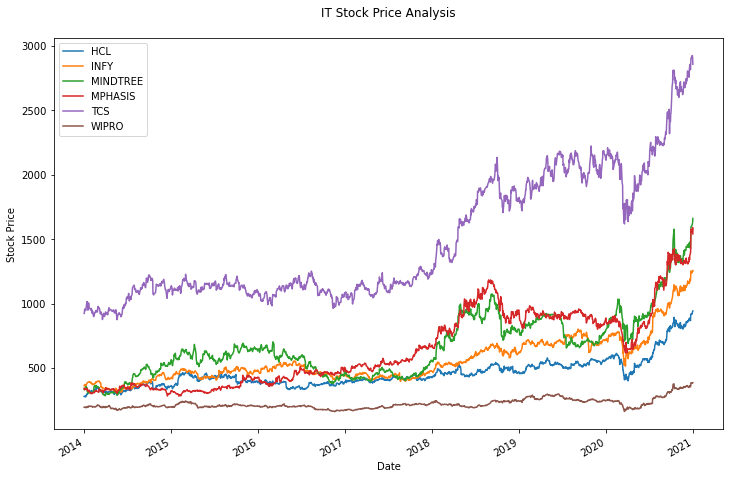

In [10]:
# Visualize the Adjusted Close of the six IT stocks over time
adj_close.plot(figsize=(12,8))
plt.title('IT Stock Price Analysis\n')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

Base on the above plot, TCS is the outperformer within the IT companies and given alpha return over time. However, we can see that each stock various its starting price. So let's base out and consider the performance.

<hide>

In [11]:
# Bring the six stocks to the same Base (100)
stock_base = adj_close.div(adj_close.iloc[0]).mul(100)
stock_base.head()

,HCL,INFY,MINDTREE,MPHASIS,TCS,WIPRO
Date,,,,,,
2014-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-01-02,99.408015,100.361888,100.626149,97.755490,100.636219,100.045227
2014-01-03,100.099349,102.801314,103.233929,96.855414,103.199736,100.705629
2014-01-06,99.376225,101.438876,103.001547,97.265586,104.007795,100.958910
2014-01-07,99.829154,99.687148,102.097863,98.917629,102.454331,99.547675


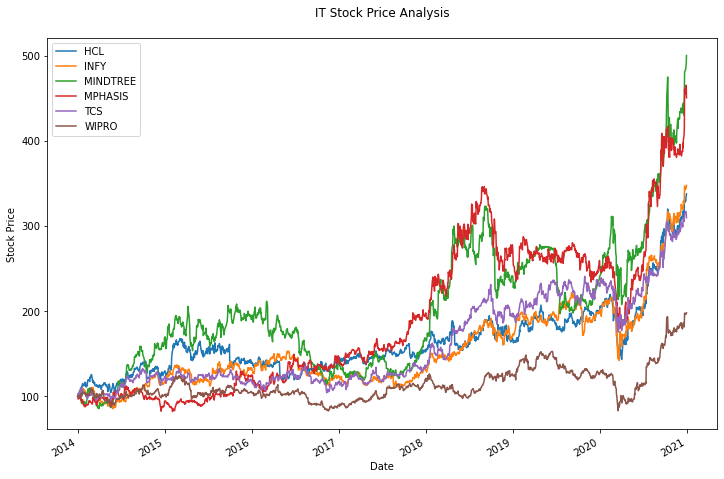

In [12]:
# Base price ploting to compare performance
stock_base.plot(figsize=(12,8))
plt.title('IT Stock Price Analysis\n')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

We can see that Mphasis and Mindtree is outperformer over time. However, companies like TCS, Infosys, and HCL is giving constant return over the period. Now, let's calculate performance based on risk/return.

<hide>

In [13]:
# Calculating daily returns for all six stocks and create a new returns DataFrame
daily_return = adj_close.pct_change().dropna()
daily_return.head()

,HCL,INFY,MINDTREE,MPHASIS,TCS,WIPRO
Date,,,,,,
2014-01-02,-0.005920,0.003619,0.006261,-0.022445,0.006362,0.000452
2014-01-03,0.006955,0.024306,0.025916,-0.009207,0.025473,0.006601
2014-01-06,-0.007224,-0.013253,-0.002251,0.004235,0.007830,0.002515
2014-01-07,0.004558,-0.017269,-0.008774,0.016985,-0.014936,-0.013978
2014-01-08,-0.007920,-0.008403,0.045615,0.000461,0.012012,-0.005544


In [14]:
# using describe method to review the summary
daily_return.describe()

,HCL,INFY,MINDTREE,MPHASIS,TCS,WIPRO
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000
mean,0.000869,0.000878,0.001178,0.001089,0.000783,0.000522
std,0.017994,0.017507,0.022005,0.020777,0.015899,0.015889
min,-0.127374,-0.153057,-0.167749,-0.096146,-0.094103,-0.089412
25%,-0.008836,-0.007818,-0.009705,-0.010317,-0.007435,-0.007674
50%,0.001177,0.000667,0.000567,-0.000259,0.000512,0.000496
75%,0.010648,0.009852,0.011974,0.011033,0.008952,0.008381
max,0.111755,0.120334,0.169257,0.145265,0.098451,0.167778


In [15]:
# For stock analysis, risk is considered as standard deviation "std" and daily average i.e "mean"
summary = daily_return.describe().T.loc[:,['mean', 'std']]
summary

,mean,std
HCL,0.000869,0.017994
INFY,0.000878,0.017507
MINDTREE,0.001178,0.022005
MPHASIS,0.001089,0.020777
TCS,0.000783,0.015899
WIPRO,0.000522,0.015889


In [16]:
# Calculating the annualized mean return and the annualized standard deviation (Risk) of returns for all six stocks.
# Note: General rule to consider 252 number of market working days

summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"]*np.sqrt(252)
summary

,mean,std
HCL,0.217346,0.284518
INFY,0.219511,0.276807
MINDTREE,0.294604,0.347929
MPHASIS,0.272130,0.328519
TCS,0.195838,0.251390
WIPRO,0.130604,0.251227


Plot and compare the performance of the six IT stocks in a (total) risk/return framework. (annualized std on the x-axis, annualized mean returns on the y-axis). Figure out the best-performing stocks are and the worst-performing stock (in terms of risk/return).

Annualized return for Mindtree is 29.69% when considering risk (standard deviation) 34.93%, following by Mpahasis return and risk are 27.43% and 32.98% respectively.

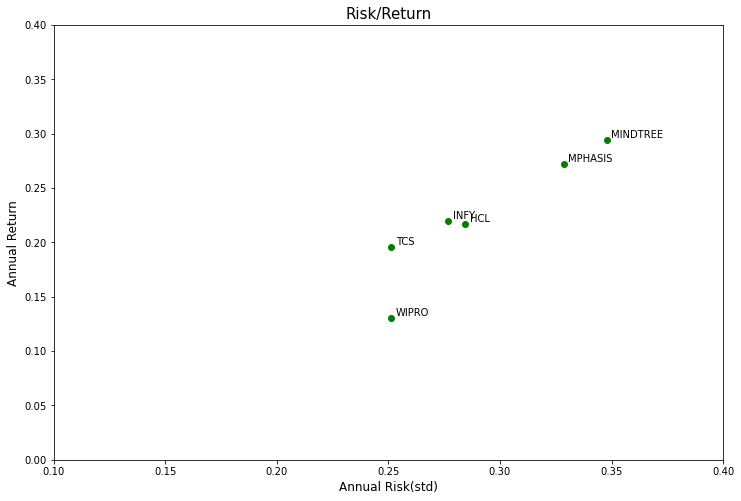

In [20]:
plt.figure(figsize=(12, 8))
plt.scatter(summary['std'], summary['mean'], color='g')
plt.xlim(0.1, 0.40)
plt.ylim(0, 0.40)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, 'std'], summary.loc[i, 'mean']), size=10)
plt.title("Risk/Return", fontsize = 15)
plt.xlabel("Annual Risk(std)", fontsize = 12)
plt.ylabel("Annual Return", fontsize = 12)
plt.show()

Thank you!

Disclaimer: Data obtained from open source library yahoo finance, the model build may not be accurate in the future, as the stock prices change daily. Hence, it is important to do your research before making investments.